# Вариант 11
## Силина

<div><img src="./Силина.png" width="450"/></div>

In [29]:
import numpy as np

def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,h1,h2,l1,l2,l3,l4,H1,H2,I1,I4,L,A,v,delta_t=0.002,gamma = 0.5,betta = 0.25):
    #Создаем матрицу коэффициентов упругости
    v = v*1000/3600
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.603),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2-l4)/v, (l2+l3)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    D = np.array([[0,0,-1,0,1,-H1],
    [-1,h1,1,0,0,0],
    [0,0,0,-1,1,H2],
    [-1,-h2,0,1,0,0],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,0,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,-1,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,I4])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [30]:
X,X_t,X_tt = solve([3*10**7,5*10**7,10**7,10**7,10**6,10**6,2*10**6,2*10**6],[0,0,0,0,5*10**4,5*10**4,5*10**4,5*10**4],2400,400,500,1100,3.4,4.5,4.1,5.6,1.9,2.2,1.9,6,45000,32000,1.1,0.25,20)

,0,1,2,3,4,5,6,7,8,9,...,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271
0,0.0,2.739555e-06,1.577120e-05,4.736692e-05,1.032569e-04,0.000187,0.000302,0.000450,0.000634,0.000856,...,-0.000082,-0.000077,-0.000072,-0.000067,-0.000062,-0.000055,-0.000047,-0.000040,-0.000034,-0.000030
1,0.0,-6.139418e-07,-3.566419e-06,-1.083182e-05,-2.390414e-05,-0.000044,-0.000072,-0.000108,-0.000153,-0.000207,...,0.000025,0.000023,0.000022,0.000021,0.000020,0.000018,0.000016,0.000014,0.000012,0.000011
2,0.0,5.139855e-07,4.708634e-06,2.141275e-05,6.546527e-05,0.000153,0.000298,0.000503,0.000768,0.001092,...,-0.000183,-0.000176,-0.000156,-0.000130,-0.000108,-0.000097,-0.000096,-0.000096,-0.000090,-0.000072
3,0.0,2.854618e-09,3.133565e-08,1.752330e-07,6.757305e-07,0.000002,0.000005,0.000012,0.000024,0.000044,...,0.000061,0.000060,0.000053,0.000042,0.000027,0.000012,-0.000001,-0.000010,-0.000013,-0.000010
4,0.0,1.771034e-07,1.407848e-06,5.829157e-06,1.725353e-05,0.000042,0.000088,0.000166,0.000288,0.000467,...,-0.000128,-0.000118,-0.000107,-0.000097,-0.000086,-0.000074,-0.000062,-0.000052,-0.000044,-0.000040
5,0.0,-9.134204e-10,-1.193944e-08,-7.767308e-08,-3.381498e-07,-0.000001,-0.000003,-0.000007,-0.000014,-0.000026,...,0.000024,0.000022,0.000020,0.000019,0.000018,0.000017,0.000015,0.000014,0.000012,0.000010


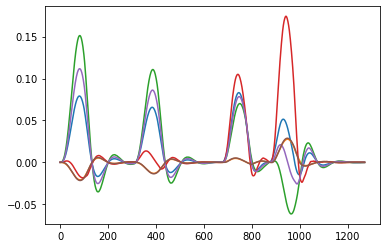

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271
0,0.0,2.739555e-03,0.010292,0.021304,0.034586,0.049409,0.065495,0.082780,0.101128,0.120245,...,0.003037,0.002577,0.002261,0.002437,0.003060,0.003708,0.003885,0.003395,0.002495,0.001717
1,0.0,-6.139418e-04,-0.002339,-0.004927,-0.008145,-0.011829,-0.015883,-0.020247,-0.024841,-0.029555,...,-0.000965,-0.000759,-0.000597,-0.000563,-0.000664,-0.000824,-0.000943,-0.000964,-0.000907,-0.000843
2,0.0,5.139855e-04,0.003681,0.013023,0.031029,0.056987,0.087273,0.117849,0.147083,0.176755,...,0.000570,0.006900,0.012534,0.013339,0.008798,0.002357,-0.001202,0.000632,0.006249,0.011174
3,0.0,2.854618e-06,0.000026,0.000118,0.000382,0.000987,0.002182,0.004297,0.007700,0.012717,...,0.001122,-0.001902,-0.004749,-0.006859,-0.007809,-0.007393,-0.005680,-0.003029,-0.000017,0.002689
4,0.0,1.771034e-04,0.001054,0.003368,0.008057,0.016348,0.029562,0.048668,0.073870,0.104503,...,0.005069,0.005119,0.005039,0.005264,0.005797,0.006174,0.005826,0.004560,0.002795,0.001341
5,0.0,-9.134204e-07,-0.000010,-0.000056,-0.000205,-0.000574,-0.001316,-0.002589,-0.004522,-0.007196,...,-0.001164,-0.000952,-0.000748,-0.000616,-0.000583,-0.000633,-0.000722,-0.000812,-0.000891,-0.000962


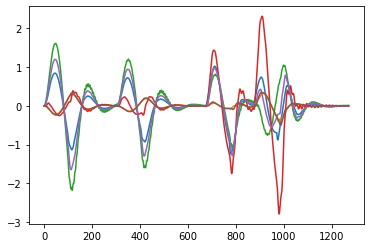

In [32]:
for i in range(len(X)):
    plt.plot(X_t[i])
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271
0,0.0,2.739555,4.812982,6.198548,7.084173,7.738422,8.348131,8.936263,9.411908,9.705111,...,-0.203545,-0.256760,-0.059214,0.235213,0.388021,0.259323,-0.082399,-0.407249,-0.492473,-0.286113
1,0.0,-0.613942,-1.110652,-1.477683,-1.740895,-1.942494,-2.112090,-2.251389,-2.342490,-2.371927,...,0.099622,0.106324,0.055582,-0.022134,-0.078549,-0.081666,-0.037453,0.016640,0.040916,0.023116
2,0.0,0.513986,2.652692,6.690096,11.315520,14.642181,15.643619,14.932773,14.300902,15.371185,...,2.662275,3.667952,1.965910,-1.161332,-3.379484,-3.061001,-0.498791,2.333434,3.282987,1.642578
3,0.0,0.002855,0.019917,0.072727,0.191228,0.413324,0.781970,1.332625,2.070491,2.946940,...,-1.481603,-1.543291,-1.303236,-0.806918,-0.143348,0.559695,1.152881,1.498793,1.512790,1.193112
4,0.0,0.177103,0.699434,1.614593,3.074444,5.216979,7.996597,11.109684,14.092785,16.539699,...,0.129187,-0.079820,0.000276,0.224345,0.308596,0.068757,-0.417087,-0.848243,-0.916746,-0.537472
5,0.0,-0.000913,-0.008286,-0.037223,-0.112012,-0.257113,-0.484781,-0.788197,-1.145037,-1.528826,...,0.098346,0.113577,0.090404,0.041539,-0.008888,-0.040596,-0.048473,-0.042312,-0.036045,-0.035342


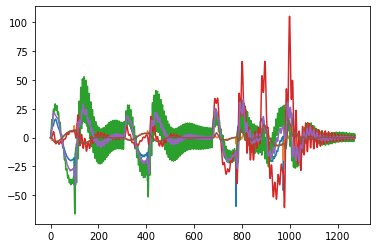

In [33]:
for i in range(len(X)):
    plt.plot(X_tt[i])
pd.DataFrame(X_tt)